<a href="https://colab.research.google.com/github/abyanjan/Churn-Prediction-Modeling/blob/master/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TELECOM CUSTOMER CHURN PREDICTION

In [1]:
!pip install -q feature-engine

     |████████████████████████████████| 176 kB 4.4 MB/s 
     |████████████████████████████████| 9.5 MB 21.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
churn_df = pd.read_csv('Churn.csv', na_values=" ")

In [5]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# data size
print(f'Number of rows: {len(churn_df)}')
print(f'Number of columns: {len(churn_df.columns)}')

Number of rows: 7043
Number of columns: 21


In [7]:
# data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#drop na values
churn_df = churn_df.dropna()

In [10]:
churn_df.shape

(7032, 21)

## VISUALIZATION - EXPLORATORY ANALYSIS

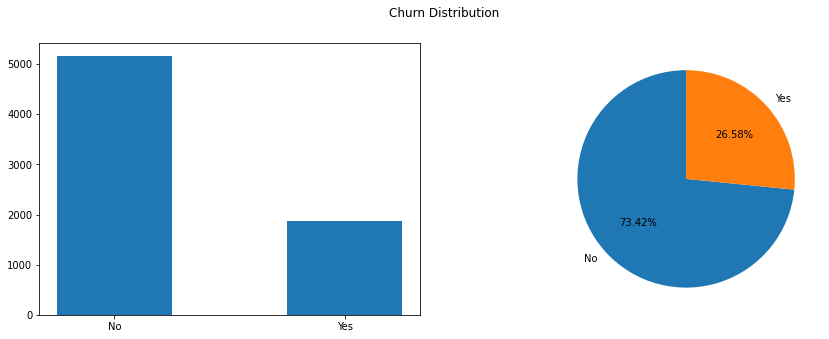

In [15]:
# target feature distribution 
churn_counts = churn_df.Churn.value_counts()
#churn_df.Churn.value_counts().plot(kind = 'bar');
plt.figure(figsize=(15,5))

# bar chart
plt.subplot(121)
plt.bar(churn_counts.index, churn_counts, width=0.5)

#pie chart
plt.subplot(122)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', startangle=90 )

plt.suptitle("Churn Distribution")
plt.show()

### Comparing Categorical Features with the target feature

**Relation Between churn rate and categorical features**

In [19]:
# convert the traget feature to binary
churn_df['Churn'] = churn_df['Churn'].map({'No':0, 'Yes':1})

In [28]:
# function to plot churn rate for a catgorical feature
def plot_categorical(var):
  churn_rate = churn_df.groupby(var).Churn.mean()
  churn_rate.plot(kind='barh')

In [23]:
# list the categorical features - excluding the customer id 
cat_vars = [var for var in churn_df.select_dtypes(include="object").columns if var!="customerID"]
print(f'Number of Categorical features: {len(cat_vars)}')
print(cat_vars)

Number of Categorical features: 15
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


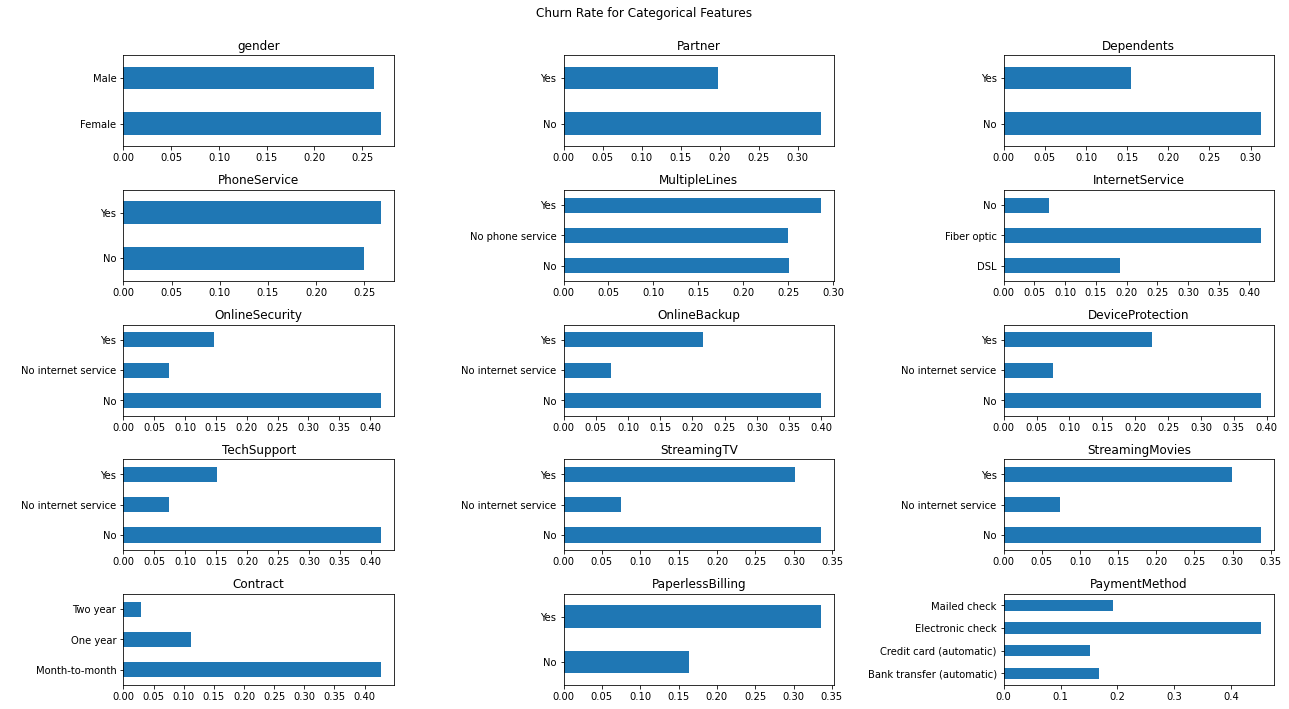

In [54]:
# plot the churn rate for the categorical features
plt.figure(figsize=(18, 10))
for i in range(len(cat_vars)):
  plt.subplot(5,3,i+1)
  plot_categorical(cat_vars[i])
  plt.ylabel(" ")
  plt.title(cat_vars[i])

plt.suptitle("Churn Rate for Categorical Features")
plt.tight_layout(rect=[0,0,1,0.95] )

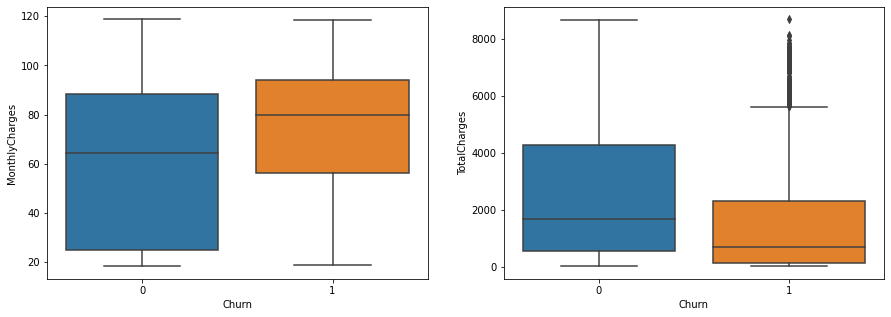

In [57]:
# Comparing Numerical Features with the Churn
plt.figure(figsize=(15,5))

# MonthlyCharges
plt.subplot(121)
sns.boxplot(x = 'Churn', y = "MonthlyCharges", data=churn_df)

# TotalCharges
plt.subplot(122)
sns.boxplot(x = 'Churn', y = "TotalCharges", data=churn_df)

plt.show()

## MODELING CHURN PREDICTION

**Train Test Split**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(churn_df, test_size = 0.3, random_state = 123)

In [60]:
print(train.shape,test.shape)

(4922, 21) (2110, 21)


In [61]:
# make a copy from the train and test sets
train_df = train.copy()
test_df = test.copy()

In [62]:
# drop the id column
train_df = train_df.drop('customerID', axis = 1)
test_df = test_df.drop('customerID', axis = 1)

In [63]:
# separate features and target and also drop the id column 
train_x = train_df.drop('Churn', axis = 1)
train_y = train['Churn']

test_x = test_df.drop('Churn', axis = 1)
test_y = test['Churn']

**Perform label encoding for categorical features**

In [64]:
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder

In [65]:
# selecting categorical features
cat_features = [feat for feat in train_x.select_dtypes(include='object').columns]
print(cat_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [66]:
# ordinal endcoding
oe = OrdinalEncoder(encoding_method='ordered', variables=cat_features)
oe.fit(train_x, train_y)

OrdinalEncoder(encoding_method='ordered', ignore_format=False,
               variables=['gender', 'Partner', 'Dependents', 'PhoneService',
                          'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport',
                          'StreamingTV', 'StreamingMovies', 'Contract',
                          'PaperlessBilling', 'PaymentMethod'])

In [67]:
# transform the data
train_x = oe.transform(train_x)
test_x = oe.transform(test_x)

train_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
463,0,0,1,1,7,1,2,2,2,1,2,2,1,1,2,1,3,99.80,673.25
5826,1,0,0,1,1,1,1,2,2,2,2,2,1,2,2,1,1,79.35,79.35
1437,0,0,1,1,27,1,2,1,2,2,2,2,2,2,2,0,2,49.00,1291.35
2890,1,1,0,0,47,1,1,2,2,2,2,2,2,2,2,0,1,70.55,3309.25
3913,0,0,0,1,72,1,2,0,0,0,0,0,0,0,0,0,0,24.80,1874.30


### Feature Selection

With Recursive Feature Elimination(RFE)

In [68]:
from feature_engine.selection import RecursiveFeatureElimination
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
RFE = RecursiveFeatureElimination(estimator=ExtraTreesClassifier(random_state=2), 
                                  scoring='roc_auc',
                                  cv = 2, 
                                  threshold=0.0008)

In [70]:
RFE.fit(train_x, train_y)

RecursiveFeatureElimination(cv=2,
                            estimator=ExtraTreesClassifier(bootstrap=False,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                    

In [71]:
# performance of model trained using all features
RFE.initial_model_performance_

0.8005307987406158

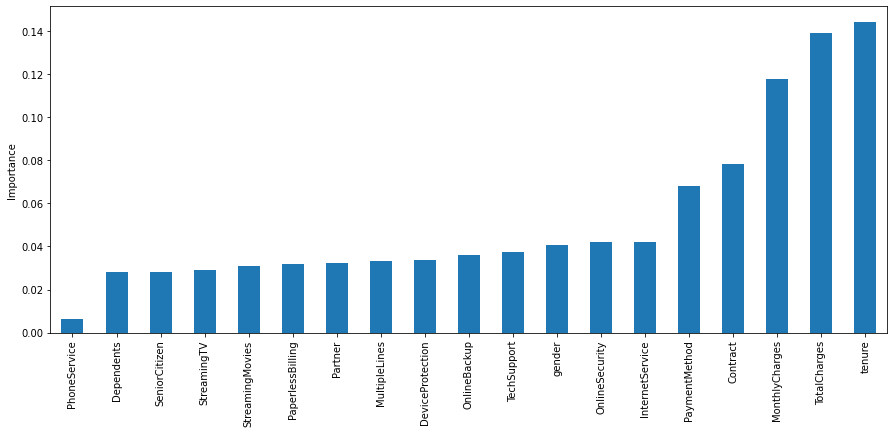

In [72]:
# importance of all features based on initial model with all features
RFE.feature_importances_.plot.bar(figsize=(15,6))
plt.ylabel('Importance')
plt.show()

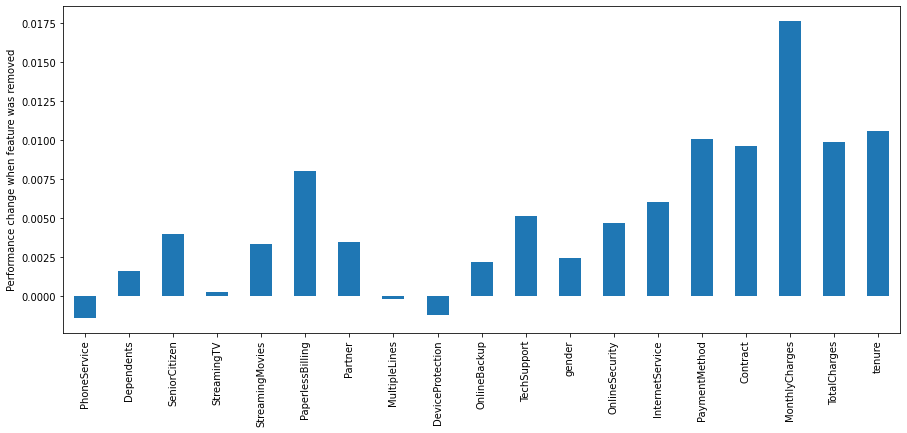

In [73]:
# change in performance when eliminating a feature
pd.Series(RFE.performance_drifts_).plot.bar(figsize=(15,6))
plt.ylabel('Performance change when feature was removed')
plt.show()

In [74]:
# features that will be dropped
RFE.features_to_drop_

['PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV']

In [75]:
# transform the data to keep only the selected features
train_x = RFE.transform(train_x)
test_x = RFE.transform(test_x)

print(train_x.shape, test_x.shape)

(4922, 15) (2110, 15)


In [76]:
selected_features = list(train_x.columns)

In [77]:
selected_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [78]:
train_x.shape

(4922, 15)

### Modeling with the Selected Features

**Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

In [80]:
RF = RandomForestClassifier(random_state=12,)
RF.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [81]:
# prediction on test data
pred = RF.predict_proba(test_x)

In [82]:
#Roc score
roc_auc_score(test_y, pred[:,1])

0.8221697036762743

In [83]:
# cross validate
RF_cv = cross_validate(estimator=RF, X = train_x, y = train_y, scoring='roc_auc', cv = 5)

np.mean(RF_cv['test_score'])

0.8202785985472119

In [84]:
# grid search hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid= {'n_estimators':[50, 100, 200],
             'max_features':['sqrt','log2'],
             'max_depth':[3, 5, 10],
             'max_samples':[0.8, 1]}
RF_search = GridSearchCV(RandomForestClassifier(random_state=12), 
                         param_grid = param_grid, 
                         cv =3, 
                         scoring= 'roc_auc')
RF_search.fit(train_x, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=12,
                                  

In [85]:
# best_score
RF_search.best_score_

0.8405601869356603

In [86]:
#best_parameter
RF_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'n_estimators': 100}

**Fit the model on the full data**

In [87]:
X = churn_df[selected_features]
y = churn_df['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,DSL,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,DSL,Yes,No,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [88]:
# selecting categorical features
cat_features = [feat for feat in X.select_dtypes(include='object').columns]
print(cat_features)

['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [89]:
# creata a label encoder
le = OrdinalEncoder(encoding_method='ordered', variables=cat_features)
le.fit(X, y)

OrdinalEncoder(encoding_method='ordered', ignore_format=False,
               variables=['gender', 'Partner', 'Dependents', 'InternetService',
                          'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                          'StreamingMovies', 'Contract', 'PaperlessBilling',
                          'PaymentMethod'])

In [90]:
le.encoder_dict_

{'Contract': {'Month-to-month': 2, 'One year': 1, 'Two year': 0},
 'Dependents': {'No': 1, 'Yes': 0},
 'InternetService': {'DSL': 1, 'Fiber optic': 2, 'No': 0},
 'OnlineBackup': {'No': 2, 'No internet service': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 2, 'No internet service': 0, 'Yes': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'Partner': {'No': 1, 'Yes': 0},
 'PaymentMethod': {'Bank transfer (automatic)': 1,
  'Credit card (automatic)': 0,
  'Electronic check': 3,
  'Mailed check': 2},
 'StreamingMovies': {'No': 2, 'No internet service': 0, 'Yes': 1},
 'TechSupport': {'No': 2, 'No internet service': 0, 'Yes': 1},
 'gender': {'Female': 1, 'Male': 0}}

In [91]:
# transform with the label encodings
X = le.transform(X)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,1,2,1,2,2,2,1,3,29.85,29.85
1,0,0,1,1,34,1,1,2,2,2,1,0,2,56.95,1889.50
2,0,0,1,1,2,1,1,1,2,2,2,1,2,53.85,108.15
3,0,0,1,1,45,1,1,2,1,2,1,0,1,42.30,1840.75
4,1,0,1,1,2,2,2,2,2,2,2,1,3,70.70,151.65


In [92]:
# save the label encoder
import pickle
with open('encoder.pkl', 'wb') as file:
  pickle.dump(le, file)

In [93]:
# fit the model on full data
full_RF_model = RandomForestClassifier(n_estimators=100, 
                                       max_depth=5, 
                                       max_features='sqrt',
                                       max_samples=0.8, 
                                       random_state = 12)

full_RF_model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [94]:
# save the model
with open('model.pkl', 'wb') as file:
  pickle.dump(full_RF_model, file)

## Model Explanation with SHAP

In [95]:
!pip install -q shap

     |████████████████████████████████| 356 kB 4.4 MB/s 


In [96]:
import shap

In [97]:
# get the model

model = full_RF_model

In [98]:
# create the explainer and get shap values for test data
explainer = shap.TreeExplainer(model=model, data= X,  model_output="probability")
shap_values = explainer(X)

100%|===================| 14040/14064 [01:15<00:00]       

Using the shap explainer on full data, it provides shap values for each samples with respect to the features.

In [ ]:
shap_values

.values =
array([[[ 1.43520961e-03, -1.43520985e-03],
        [ 2.90990565e-03, -2.90990562e-03],
        [ 2.79185126e-03, -2.79185123e-03],
        ...,
        [-2.55129485e-02,  2.55129490e-02],
        [ 1.79142117e-02, -1.79142109e-02],
        [-9.52937462e-02,  9.52937470e-02]],

       [[-1.97888759e-04,  1.97888802e-04],
        [ 2.16897398e-03, -2.16897406e-03],
        [-1.57834268e-03,  1.57834290e-03],
        ...,
        [ 1.23924592e-02, -1.23924596e-02],
        [ 1.56205367e-02, -1.56205360e-02],
        [ 1.20376920e-02, -1.20376925e-02]],

       [[ 8.59993633e-05, -8.59993716e-05],
        [ 3.96878146e-03, -3.96878144e-03],
        [-4.00011650e-03,  4.00011676e-03],
        ...,
        [ 1.28293082e-02, -1.28293086e-02],
        [ 1.70672333e-02, -1.70672328e-02],
        [-7.36348993e-02,  7.36348998e-02]],

       ...,

       [[ 8.58095618e-04, -8.58095569e-04],
        [ 2.07493075e-03, -2.07493075e-03],
        [ 2.84671355e-03, -2.84671370e-03],
        

In [ ]:
shap_values.base_values

array([[0.76277932, 0.23722068],
       [0.76277932, 0.23722068],
       [0.76277932, 0.23722068],
       ...,
       [0.76277932, 0.23722068],
       [0.76277932, 0.23722068],
       [0.76277932, 0.23722068]])

Expected/Base/Reference value is the value that would be predicted if we didn’t know any features of a sample

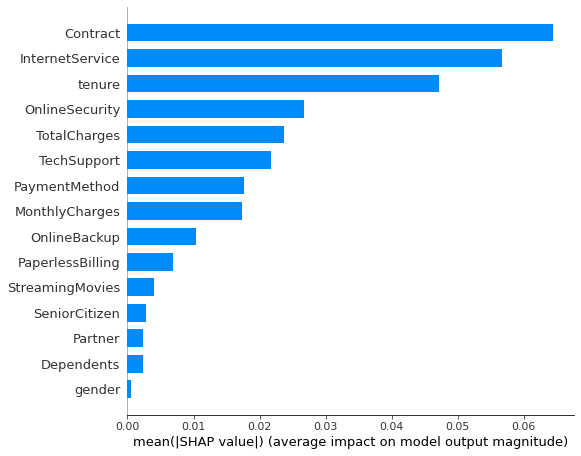

In [99]:
# feature importance
shap.summary_plot(shap_values.values[:,:,1], plot_type='bar', feature_names=selected_features)

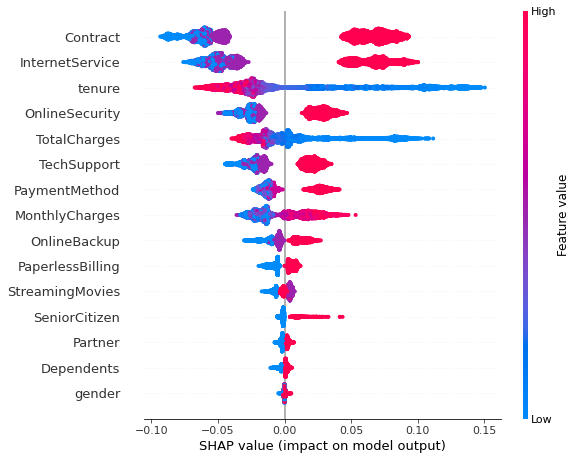

In [100]:
#summary plot
shap.summary_plot(shap_values[:,:,1], features= X)

In [101]:
# feature importance for a single observation
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values.values[15,:,1], features=X.iloc[15,:])

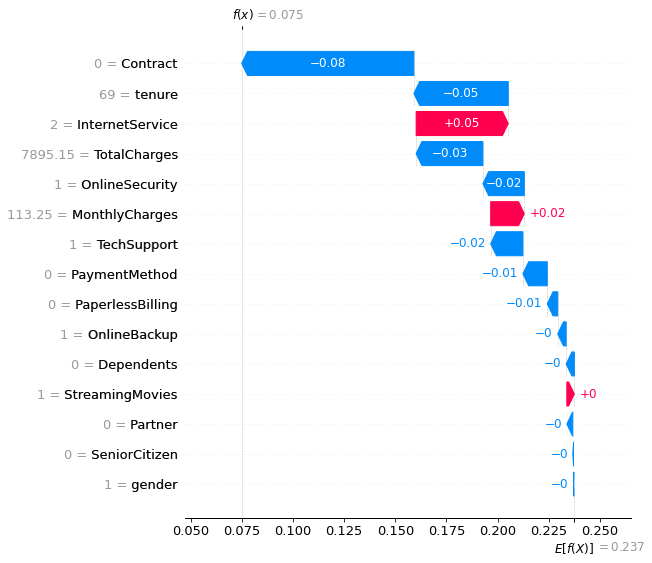

In [102]:
# waterfall plot - showcasing feature effect on final prediction for a single observation
shap.plots.waterfall(shap_values=shap_values[15][:,1], max_display=15)

In [103]:
# save the shap values
with open ("shap_values.pkl", 'wb') as file:
  pickle.dump(shap_values, file) 